In [2]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt

### Read the data

In [3]:
with xr.open_dataset('../data/scattering_coefficients_32_32.nc') as dset:
    scat_coef_1 = dset['scat_coef_1']
    species_labels = dset['species'].to_numpy()
    stations_labels = dset['station'].to_numpy()
    distances_labels = dset['distance'].to_numpy()

In [4]:
indices = [38844,  2474, 57421, 12559, 57573, 21798, 10983, 12673] # indices of the modified dataset
index_comp = 0 # index of the seismic component

In [5]:
# # define a matrix with nans where frequency_0 < frequency_1
# masking_matrix = np.ones(scat_coef_1.shape[2:])
# for i,f_0 in enumerate(scat_coef_1.frequency_0):
#     for j,f_1 in enumerate(scat_coef_1.frequency_1):
#         if f_0 < f_1:
#             masking_matrix[i,j] = np.nan

### Figure of the paper

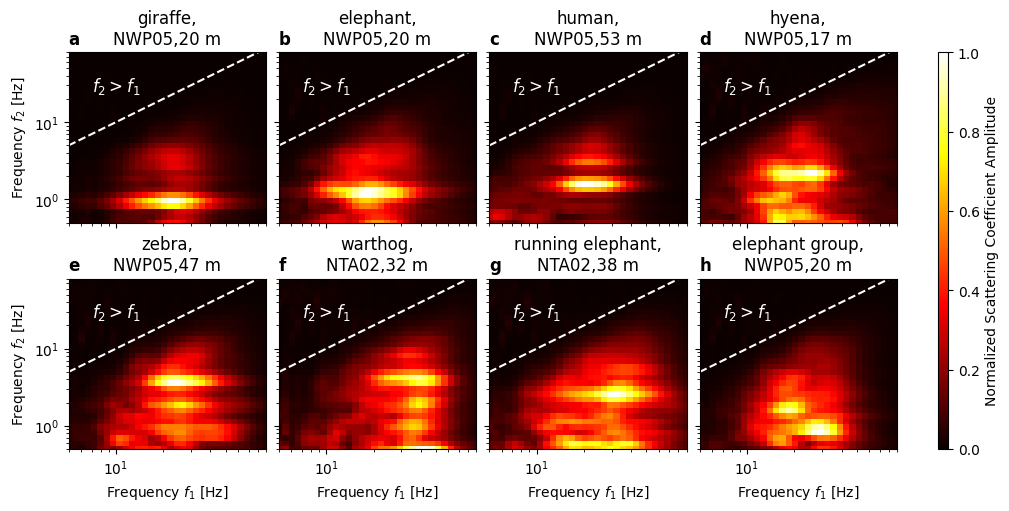

In [6]:
fig, axes = plt.subplots(2, len(indices)//2, figsize=(10, 5), sharey=True, sharex=True, constrained_layout=True)

axes[0][0].set_ylabel('Frequency $f_2$ [Hz]')
axes[1][0].set_ylabel('Frequency $f_2$ [Hz]')

axes[1][0].set_xlabel('Frequency $f_1$ [Hz]')
axes[1][1].set_xlabel('Frequency $f_1$ [Hz]')
axes[1][2].set_xlabel('Frequency $f_1$ [Hz]')
axes[1][3].set_xlabel('Frequency $f_1$ [Hz]')


axes = axes.flatten()
vmin=0
vmax=1

# plot the scattering coefficients
for i, index in enumerate(indices):

    ax = axes[i]
    scat_coef_1_example = scat_coef_1[index, index_comp]
    scat_coef_1_example /= np.max(scat_coef_1_example)
    #scat_coef_1_example = masking_matrix * scat_coef_1_example

    # plot the scattering coefficients
    img = ax.pcolormesh(scat_coef_1.frequency_0, scat_coef_1.frequency_1, scat_coef_1_example.T,shading='auto',cmap='hot', vmin=vmin, vmax=vmax)
    ax.plot(scat_coef_1.frequency_0, scat_coef_1.frequency_0, 'w--')
    ax.text(10, 30, '$f_2 > f_1$', horizontalalignment='center', verticalalignment='center', color='white', fontsize=12)
    if i == 6:
        ax.set_title('running %s,\n%s,%d m' % (species_labels[index], stations_labels[index], distances_labels[index]))
    elif i == 7:
        ax.set_title('%s group,\n%s,%d m' % (species_labels[index], stations_labels[index], distances_labels[index]))
    else:
        ax.set_title('%s,\n%s,%d m' % (species_labels[index], stations_labels[index], distances_labels[index]))

    ax.set_title(chr(97+i), loc='left', fontsize=12, fontweight='bold')
    
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim([scat_coef_1.frequency_0[0], scat_coef_1.frequency_0[-1]])
axes[0].set_ylim([scat_coef_1.frequency_1[0], scat_coef_1.frequency_1[-1]])

fig.colorbar(img, ax=axes, orientation='vertical', label='Normalized Scattering Coefficient Amplitude', pad=0.05, aspect=40)

### Figure for a presentation

In [7]:
indices = [38844,  2474, 57421, 12559, 57573, 21798] # indices of the modified dataset

In [8]:
# increase font size
plt.rcParams.update({'font.size': 12})

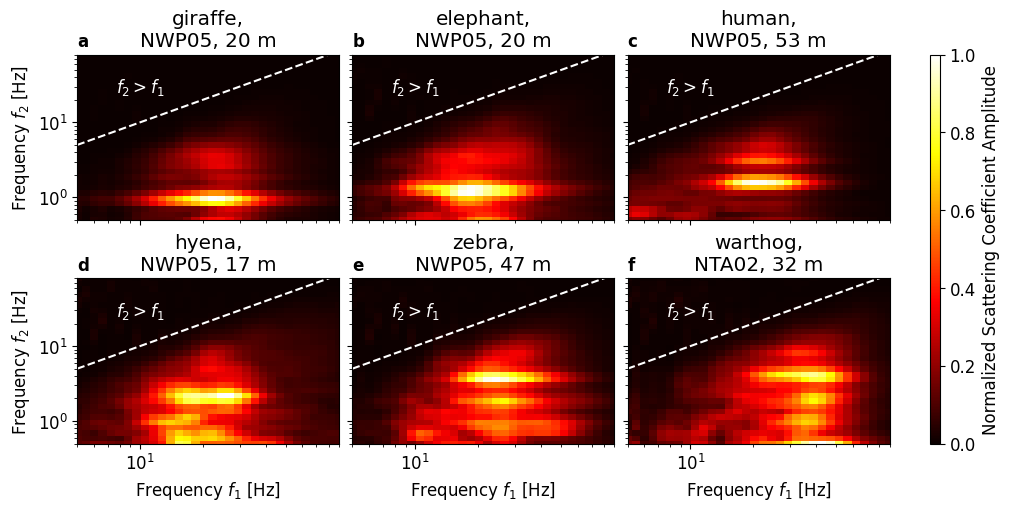

In [10]:
fig, axes = plt.subplots(2, len(indices)//2, figsize=(10, 5), sharey=True, sharex=True, constrained_layout=True)

axes[0][0].set_ylabel('Frequency $f_2$ [Hz]')
axes[1][0].set_ylabel('Frequency $f_2$ [Hz]')

axes[1][0].set_xlabel('Frequency $f_1$ [Hz]')
axes[1][1].set_xlabel('Frequency $f_1$ [Hz]')
axes[1][2].set_xlabel('Frequency $f_1$ [Hz]')


axes = axes.flatten()
vmin=0
vmax=1

for i, index in enumerate(indices):
    ax = axes[i]
    scat_coef_1_example = scat_coef_1[index, index_comp]
    scat_coef_1_example /= np.max(scat_coef_1_example)
    #scat_coef_1_example = masking_matrix * scat_coef_1_example
    img = ax.pcolormesh(scat_coef_1.frequency_0, scat_coef_1.frequency_1, scat_coef_1_example.T,shading='auto',cmap='hot', vmin=vmin, vmax=vmax)
    ax.plot(scat_coef_1.frequency_0, scat_coef_1.frequency_0, 'w--')
    ax.text(10, 30, '$f_2 > f_1$', horizontalalignment='center', verticalalignment='center', color='white', fontsize=12)
    ax.set_title('%s,\n%s, %d m' % (species_labels[index], stations_labels[index], distances_labels[index]))
    ax.set_title(chr(97+i), loc='left', fontsize=12, fontweight='bold')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim([scat_coef_1.frequency_0[0], scat_coef_1.frequency_0[-1]])
axes[0].set_ylim([scat_coef_1.frequency_1[0], scat_coef_1.frequency_1[-1]])

fig.colorbar(img, ax=axes, orientation='vertical', label='Normalized Scattering Coefficient Amplitude', pad=0.05, aspect=40)